In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [57]:
# Step 1: Load the data
import pandas as pd
df = pd.read_csv("ConflictPalestineIsraelDataset.csv")

df.head()

# Step 2: Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   full_text            2075 non-null   object
 1   created_at           2075 non-null   object
 2   id_str               2075 non-null   int64 
 3   quote_count          2075 non-null   int64 
 4   reply_count          2075 non-null   int64 
 5   retweet_count        2075 non-null   int64 
 6   favorite_count       2075 non-null   int64 
 7   lang                 2075 non-null   object
 8   user_id_str          2075 non-null   int64 
 9   conversation_id_str  2075 non-null   int64 
 10  username             2075 non-null   object
 11  tweet_url            2075 non-null   object
dtypes: int64(7), object(5)
memory usage: 194.7+ KB


In [3]:
lenDF = len(df)
print(lenDF)

2075


Cleaning The Data

In [59]:
columns_to_drop = ['tweet_url', 'username','created_at','quote_count','reply_count', 'retweet_count','favorite_count','user_id_str','conversation_id_str','id_str']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [60]:
df.head()

,full_text
0,I can't see a war between two countries. Israe...
1,@Forbes Free palestine
2,Now I know why hitla cleaned y’all out free Pa...
3,@Adii__here @goddeketal Their going to flatten...
4,@DrLoupis You seemed fine when it was just pal...


In [35]:
# x = "  https://t.co/yKZ9MbJQo3 hamudi https://t.co/yKZ9MbJQo3 #freepalestine https://t.co/yKZ9MbJQo3"
# x = re.sub(r'^\s+', '', x) 

# print(x)

https://t.co/yKZ9MbJQo3 hamudi https://t.co/yKZ9MbJQo3 #freepalestine https://t.co/yKZ9MbJQo3


In [61]:
for row in range(0, lenDF):
    #menghilangkan @
    df['full_text'][row] = re.sub(r'@[\w.]+', '', df['full_text'][row]) 
    #menghilangkan link https
    df['full_text'][row] = re.sub(r'https(\S)*', '', df['full_text'][row]) 
    # #menghilangkan #
    df['full_text'][row] = re.sub(r'#', '', df['full_text'][row]) 
    #menghilangkan -
    df['full_text'][row] = re.sub(r'-', ' ', df['full_text'][row]) 
    #menghilangkan '
    df['full_text'][row] = re.sub(r"'", '', df['full_text'][row]) 
    #menghilangkan _
    df['full_text'][row] = re.sub(r"_", '', df['full_text'][row])
    # #menghilangkan ?
    df['full_text'][row] = re.sub(r"\?", ' ', df['full_text'][row])
    #menghilangkan !
    df['full_text'][row] = re.sub(r"!", ' ', df['full_text'][row])
    # #menghilangkan .
    df['full_text'][row] = re.sub(r"\.", '', df['full_text'][row])
    #menghilangkan ’
    df['full_text'][row] = re.sub(r"’", '', df['full_text'][row])
    #menghilangkan “
    df['full_text'][row] = re.sub(r"“", '', df['full_text'][row])
    #menghilangkan ”
    df['full_text'][row] = re.sub(r"”", '', df['full_text'][row])
    #menghilangkan emot
    df['full_text'][row] = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002600-\U000026FF\U00002700-\U000027BF\U00002B50\U00002B06]+', '', df['full_text'][row])
    #menghilangkan double space
    df['full_text'][row] = re.sub(r'\s+', ' ', df['full_text'][row])
    #menghilangkan space diawal
    df['full_text'][row] = re.sub(r'^\s+', '', df['full_text'][row])

In [62]:
df.head()

,full_text
0,I cant see a war between two countries Israel ...
1,Free palestine
2,Now I know why hitla cleaned yall out free Pal...
3,Their going to flatten Palestine pave it over ...
4,You seemed fine when it was just palestine bom...


In [139]:
df.to_csv('result.csv')

Sentimen Analyst

In [63]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohsu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohsu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mohsu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [64]:
df['sentiment'] = 'no sentiment'

In [65]:
def analyze_sentiment(text):
    # Create a SentimentIntensityAnalyzer object
    sia = SentimentIntensityAnalyzer()

    # Get the sentiment scores
    sentiment_scores = sia.polarity_scores(text)

    # Classify sentiment based on the compound score
    if sentiment_scores['compound'] >= 0.05:
        sentiment_label = "Positive"
    elif sentiment_scores['compound'] <= -0.05:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    return sentiment_label

In [66]:
for row in range(0, lenDF):
    df['sentiment'][row] = analyze_sentiment(df['full_text'][row]) 

In [67]:
countPositive = 0
countNegative = 0
countNeutral = 0
for row in range(0, lenDF):
    if df['sentiment'][row] == 'Positive' : countPositive = countPositive + 1
    elif df['sentiment'][row] == 'Negative' : countNegative = countNegative + 1   
    elif df['sentiment'][row] == 'Neutral' : countNeutral = countNeutral + 1

print('Jumlah countPositive', countPositive)
print('Jumlah countNegative', countNegative)
print('Jumlah countNeutral', countNeutral)

Jumlah countPositive 784
Jumlah countNegative 750
Jumlah countNeutral 541


In [145]:
df.to_csv('result.csv')

Labelling custom

In [1]:
import pandas as pd
df = pd.read_csv("result.csv")

In [68]:
def label_data(text, listInsight, name):
    # Pra-pemrosesan teks
    tokens = word_tokenize(text.lower())  # Tokenisasi dan ubah teks menjadi lowercase
    tokens = [word for word in tokens if word.isalnum()]  # Hapus karakter non-alphanumeric
    # tokens = [word for word in tokens if word not in stopwords.words('english')]  # Hapus stop words
    
    matched_keywords = [keyword for keyword in listInsight if keyword in tokens]
    
    # Tentukan label berdasarkan keberadaan keyword
    if matched_keywords:
        return name
    else :
        return 'No Insight'


In [69]:
df['insight'] = 'No Insight'

In [70]:
def giveLabel(list, name):
    for row in range(0, lenDF):
        if df['insight'][row] == 'No Insight' :
            df['insight'][row] = label_data(str(df['full_text'][row]), list, name)

In [71]:
list_peace = ['peace', 'harmony', 'nonviolence', 'stop', 'end', 'ship', 'love', 'beloved', 'ily', 'sympathy', 'hope', 'humanity', 'cease', 'ceasefire']
giveLabel(list_peace, 'peace')

In [72]:
list_proIsrael = ['terrorist', 'pro-israel', 'accused']
giveLabel(list_proIsrael, 'proIsrael')

In [73]:
list_sadly = ['sadly', 'sad', 'sorry', 'innocent', 'children', 'young', 'babies', ]
giveLabel(list_sadly, 'sadly')

In [74]:
list_boikot = ['boycot', 'blacklist']
giveLabel(list_boikot, 'boikot')

In [75]:
list_genocide = ['genocide']
giveLabel(list_genocide, 'genocide')

In [76]:
list_religionFight = ['muslim', 'islam', 'allah', 'christian', 'jewish', 'Islamic', 'jews']
giveLabel(list_religionFight, 'religionFight')

In [69]:
# list_israel = ['zionist', 'evil']
# giveLabel(list_israel, 'zionist')

In [77]:
list_supportPalestine = ['raise','watermelon', 'free', 'help', 'helping', 'save', 'donation', 'coalition', 'pray', 'support', 'stand', '#palestine', 'freepalestine', 'hope','freedom', 'protect', 'with']
giveLabel(list_supportPalestine, 'supportPalestine')

In [78]:
list_war = ['ww3', 'war', 'bombing', 'burn', 'bombed', 'violence', 'against','fight', 'fighting', 'rocket', 'conflict', 'action', 'gun', 'action', 'killing', 'police', 'tension', 'conflict', 'crisis', 'army', 'artillery', 'gazaunderattack', 'attacks', 'fire']
giveLabel(list_war, 'war')

In [ ]:
list_kiamat = ['kiamat']
giveLabel(list_kiamat, 'kiamat')

In [71]:
# list_tagline = ['fromrivertothesea']
# giveLabel(list_tagline, 'tagline')

In [79]:
list_suffering = ['suffer', 'pain', 'struggle', 'despair','suffering', 'hell', 'through', 'bullying']
giveLabel(list_suffering, 'suffering')

In [80]:
list_against_israel = ['hate', 'speech', 'zionist', 'evil', 'israhell']
giveLabel(list_against_israel, 'against_israel')

In [81]:
list_selfdefend = ['hamas', 'defended', 'brave', 'defend']
giveLabel(list_selfdefend, 'selfdefend')

In [82]:
list_israel_crime = ['kill', 'innocent', 'terrorist', 'flatten', 'cleansing', 'attacked', 'forced', 'violence', 'occupation', 'murdered', 'force', 'crimes', 'crime', 'aggression', 'victim']
giveLabel(list_israel_crime, 'israel_crime')

In [83]:
list_israel_lies = ['provoke', 'hate', 'liars', 'lie', 'hating', 'lies']
giveLabel(list_israel_lies, 'israel_lies')

In [84]:
list_hypocritical = ['sabotage', 'propaganda', 'islamophobism', 'evidence', 'abuse']
giveLabel(list_hypocritical, 'hypocritical')

In [85]:
list_wonder = ['confused', 'why', 'arguing', 'what', 'where', 'how', 'when', 'whats', '?']
giveLabel(list_wonder, 'wonder')

In [86]:
list_historyTalk = ['history', 'research']
giveLabel(list_historyTalk, 'historyTalk')

In [78]:
# list_people_israel = ['hoax']
# giveLabel(list_people_israel, 'people_israel')

In [87]:
list_government_war = ['political', 'land', 'politique', 'money', 'democracy', 'control', 'goverment', 'history','jerusalem', 'fight', 'demonstrate', 'deported', 'civil']
giveLabel(list_government_war, 'government_war')

In [88]:
list_conflict = ['palestine', 'israel']
giveLabel(list_conflict, 'conflict')

In [89]:
for row in range(0, lenDF):
    if (df['insight'][row]) == 'No Insight': 
        print(df['full_text'][row])

In [92]:
# listToDrop = []
# for row in range(0, lenDF):
#     if (df['insight'][row]) == 'No Insight': 
#         listToDrop.append(row)
#         print(df['full_text'][row])

In [54]:
# for x in listToDrop :
#     df = df.drop(int(x))

In [53]:
# print(listToDrop)

[22, 46, 52, 53, 55, 70, 94, 123, 143, 147, 166, 172, 183, 185, 186, 190, 192, 193, 196, 198, 207, 211, 216, 221, 238, 246, 248, 276, 293, 294, 308, 310, 311, 316, 329, 332, 333, 340, 341, 355, 356, 367, 378, 402, 406, 413, 414, 421, 423, 424, 425, 429, 435, 441, 450, 462, 466, 489, 509, 515, 521, 527, 550, 557, 567, 569, 571, 578, 580, 584, 585, 598, 601, 616, 620, 635, 638, 644, 657, 661, 663, 666, 675, 682, 684, 689, 702, 708, 718, 724, 728, 729, 734, 735, 751, 753, 756, 767, 772, 790, 794, 797, 801, 803, 805, 809, 812, 820, 828, 837, 840, 853, 856, 862, 865, 872, 881, 890, 895, 906, 912, 922, 929, 931, 943, 956, 957, 969, 977, 981, 995, 997, 1005, 1006, 1011, 1014, 1016, 1020, 1023, 1029, 1031, 1032, 1034, 1040, 1041, 1052, 1060, 1067, 1068, 1069, 1077, 1082, 1083, 1090, 1096, 1104, 1109, 1110, 1114, 1121, 1122, 1126, 1127, 1133, 1141, 1143, 1147, 1167, 1169, 1189, 1196, 1197, 1203, 1210, 1211, 1214, 1226, 1229, 1258, 1261, 1285, 1287, 1290, 1295, 1298, 1301, 1313, 1318, 1319, 1339

In [56]:
# df.to_csv('test.csv', index=False)

In [90]:
No_Insight = 0
israel_lies = 0
conflict = 0
war = 0
historyTalk = 0
wonder = 0
hypocritical = 0
israel_crime = 0
against_israel = 0
suffering = 0
supportPalestine = 0
religionFight = 0
genocide = 0
boikot = 0
sadly = 0
proIsrael = 0
selfdefend = 0
peace = 0

for row in range(0, lenDF):
    if (df['insight'][row]) == 'peace': peace = peace + 1
    elif (df['insight'][row]) == 'selfdefend': selfdefend = selfdefend + 1
    elif (df['insight'][row]) == 'proIsrael': proIsrael = proIsrael + 1
    elif (df['insight'][row]) == 'sadly': sadly = sadly + 1
    elif (df['insight'][row]) == 'boikot': boikot = boikot + 1
    elif (df['insight'][row]) == 'genocide': genocide = genocide + 1
    elif (df['insight'][row]) == 'religionFight': religionFight = religionFight + 1
    elif (df['insight'][row]) == 'supportPalestine': supportPalestine = supportPalestine + 1
    elif (df['insight'][row]) == 'suffering': suffering = suffering + 1
    elif (df['insight'][row]) == 'against_israel': against_israel = against_israel + 1
    elif (df['insight'][row]) == 'israel_crime': israel_crime = israel_crime + 1
    elif (df['insight'][row]) == 'hypocritical': hypocritical = hypocritical + 1
    elif (df['insight'][row]) == 'wonder': wonder = wonder + 1
    elif (df['insight'][row]) == 'historyTalk': historyTalk = historyTalk + 1
    elif (df['insight'][row]) == 'war': war = war + 1
    elif (df['insight'][row]) == 'conflict': conflict = conflict + 1
    elif (df['insight'][row]) == 'israel_lies': israel_lies = israel_lies + 1
    elif (df['insight'][row]) == 'No Insight': No_Insight = No_Insight + 1

print('No_Insight : ',No_Insight)
print('israel_lies : ',israel_lies)
print('conflict : ',conflict)
print('war : ',war)
print('historyTalk : ',historyTalk)
print('wonder : ',wonder)
print('hypocritical : ',hypocritical)
print('israel_crime : ',israel_crime)
print('against_israel : ',against_israel)
print('suffering : ',suffering)
print('supportPalestine : ',supportPalestine)
print('religionFigh : ',religionFight)
print('genocide : ',genocide)
print('boikot : ',boikot)
print('sadly : ',sadly)
print('proIsrael : ',proIsrael)
print('selfdefend : ',selfdefend)
print('peace : ',peace)

No_Insight :  0
israel_lies :  6
conflict :  434
war :  149
historyTalk :  11
wonder :  132
hypocritical :  5
israel_crime :  39
against_israel :  18
suffering :  20
supportPalestine :  570
religionFigh :  155
genocide :  43
boikot :  1
sadly :  104
proIsrael :  48
selfdefend :  100
peace :  211


In [93]:
df.to_csv('result2.csv', index = False)

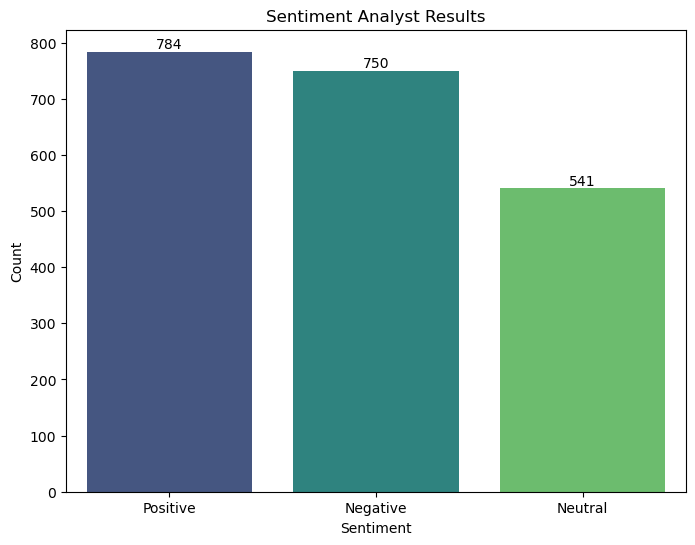

In [12]:
# Count occurrences of each sentiment
sentiment_counts = pd.Series(df['sentiment']).value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Display count values on top of each bar
for i, count in enumerate(sentiment_counts.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')


plt.title('Sentiment Analyst Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


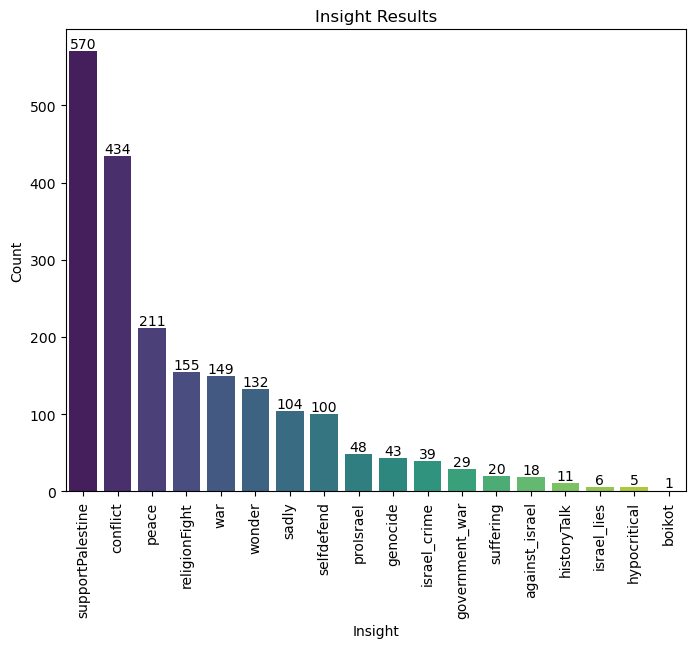

In [10]:
# Count occurrences of each sentiment
sentiment_counts = pd.Series(df['insight']).value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display count values on top of each bar
for i, count in enumerate(sentiment_counts.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')


plt.title('Insight Results')
plt.xlabel('Insight')
plt.ylabel('Count')
plt.show()


Language of Tweets

In [2]:
import pandas as pd
df1 = pd.read_csv("result.csv")
df = pd.read_csv("ConflictPalestineIsraelDataset.csv")

df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2075 non-null   int64 
 1   full_text   2075 non-null   object
 2   sentiment   2075 non-null   object
 3   insight     2075 non-null   object
 4   lang        2075 non-null   object
dtypes: int64(1), object(4)
memory usage: 81.2+ KB


In [27]:
# df1.drop('Unnamed: 0', axis=1)

,full_text,sentiment,insight
0,I cant see a war between two countries Israel ...,Negative,sadly
1,Free palestine,Positive,supportPalestine
2,Now I know why hitla cleaned yall out free Pal...,Positive,supportPalestine
3,Their going to flatten Palestine pave it over ...,Neutral,supportPalestine
4,You seemed fine when it was just palestine bom...,Positive,war
...,...,...,...
2070,Free Palestine 🇵🇸,Positive,supportPalestine
2071,When will our Ummah Wake up When whole of the ...,Neutral,wonder
2072,I stand with Palestine 🇵🇸🇵🇸🇵🇸🇵🇸🇵🇸🇵🇸🇵🇸🇵🇸🇵🇸🇵🇸🇵🇸,Neutral,supportPalestine
2073,Hamas attacked and killed many israelis Why we...,Negative,supportPalestine


In [28]:
# df1['lang'] = df['lang']

In [3]:
kategori_count = {}

for kategori in df1['lang']:
    if kategori in kategori_count:
        kategori_count[kategori] += 1
    else:
        kategori_count[kategori] = 1
for kategori, jumlah in kategori_count.items():
    print(f'{kategori}: {jumlah}')

en: 1663
et: 98
fr: 131
tr: 8
ur: 6
hi: 17
und: 16
ta: 1
qht: 22
qme: 16
in: 51
ca: 2
ar: 16
tl: 4
de: 3
ko: 2
ro: 3
es: 2
ht: 2
cs: 2
it: 2
nl: 1
el: 2
pt: 2
ja: 2
bn: 1


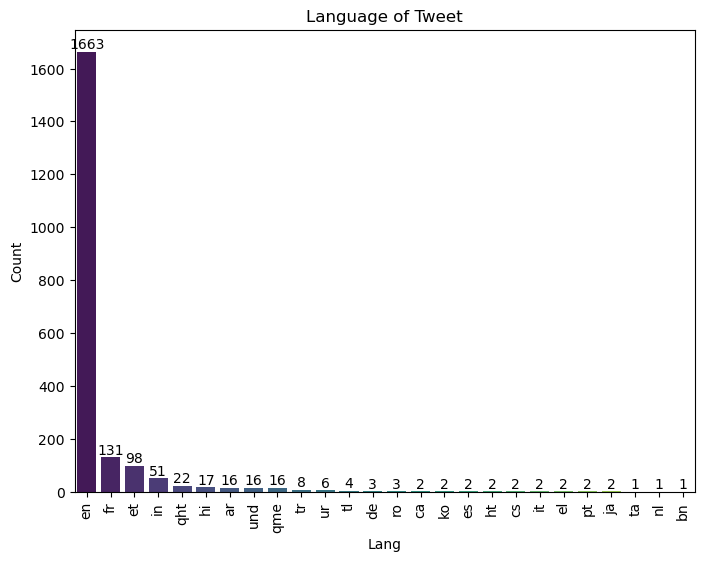

In [30]:
# Count occurrences of each sentiment
sentiment_counts = pd.Series(df1['lang']).value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Rotate x-axis labels vertically
plt.xticks(rotation='vertical')

# Display count values on top of each bar
for i, count in enumerate(sentiment_counts.values):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')


plt.title('Language of Tweet')
plt.xlabel('Lang')
plt.ylabel('Count')
plt.show()


In [ ]:
def count_category():
    count = {}
    No_Insight = 0
    israel_lies = 0
    conflict = 0
    war = 0
    historyTalk = 0
    wonder = 0
    hypocritical = 0
    israel_crime = 0
    against_israel = 0
    suffering = 0
    supportPalestine = 0
    religionFight = 0
    genocide = 0
    boikot = 0
    sadly = 0
    proIsrael = 0
    selfdefend = 0
    peace = 0

    for row in range(0, lenDF):
        if (df['insight'][row]) == 'peace': peace = peace + 1
        elif (df['insight'][row]) == 'selfdefend': selfdefend = selfdefend + 1
        elif (df['insight'][row]) == 'proIsrael': proIsrael = proIsrael + 1
        elif (df['insight'][row]) == 'sadly': sadly = sadly + 1
        elif (df['insight'][row]) == 'boikot': boikot = boikot + 1
        elif (df['insight'][row]) == 'genocide': genocide = genocide + 1
        elif (df['insight'][row]) == 'religionFight': religionFight = religionFight + 1
        elif (df['insight'][row]) == 'supportPalestine': supportPalestine = supportPalestine + 1
        elif (df['insight'][row]) == 'suffering': suffering = suffering + 1
        elif (df['insight'][row]) == 'against_israel': against_israel = against_israel + 1
        elif (df['insight'][row]) == 'israel_crime': israel_crime = israel_crime + 1
        elif (df['insight'][row]) == 'hypocritical': hypocritical = hypocritical + 1
        elif (df['insight'][row]) == 'wonder': wonder = wonder + 1
        elif (df['insight'][row]) == 'historyTalk': historyTalk = historyTalk + 1
        elif (df['insight'][row]) == 'war': war = war + 1
        elif (df['insight'][row]) == 'conflict': conflict = conflict + 1
        elif (df['insight'][row]) == 'israel_lies': israel_lies = israel_lies + 1
        elif (df['insight'][row]) == 'No Insight': No_Insight = No_Insight + 1

    count['No_Insight'] = No_Insight
    count['israel_lies'] = israel_lies
    count['conflict'] = conflict
    count['war'] = war
    count['historyTalk'] = historyTalk
    count['wonder'] = wonder
    count['hypocritical'] = hypocritical
    count['israel_crime'] = israel_crime
    count['against_israel'] = against_israel
    count['suffering'] = suffering
    count['supportPalestine'] = supportPalestine
    count['religionFigh'] = religionFight
    count['genocide'] = genocide
    count['boikot'] = boikot
    count['sadly'] = sadly
    count['proIsrael'] = proIsrael
    count['selfdefend'] = selfdefend
    count['peace'] = peace


    return count

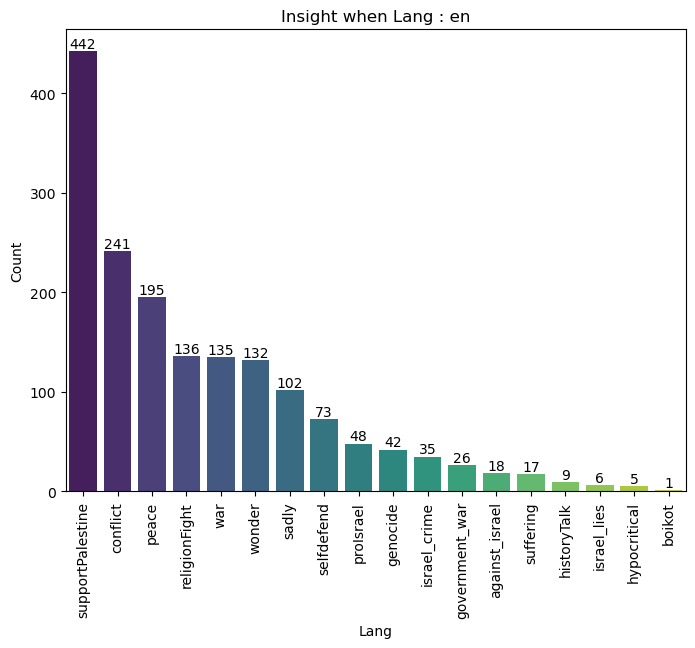

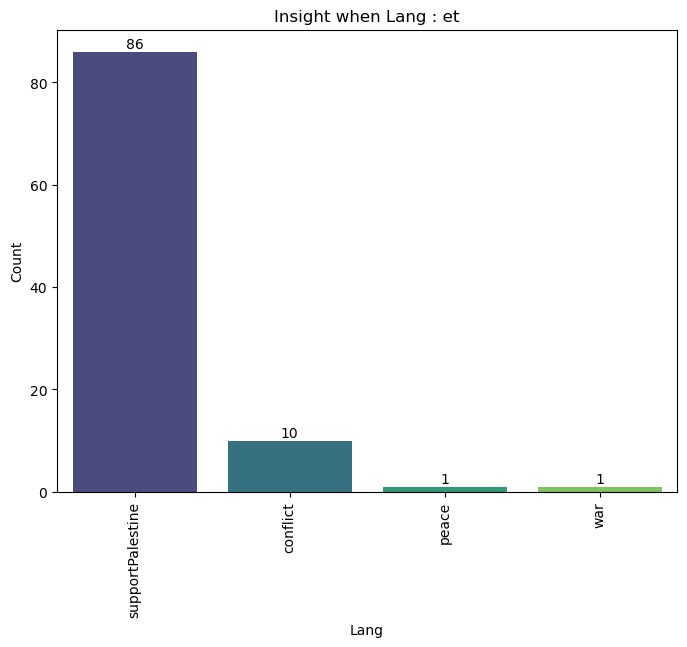

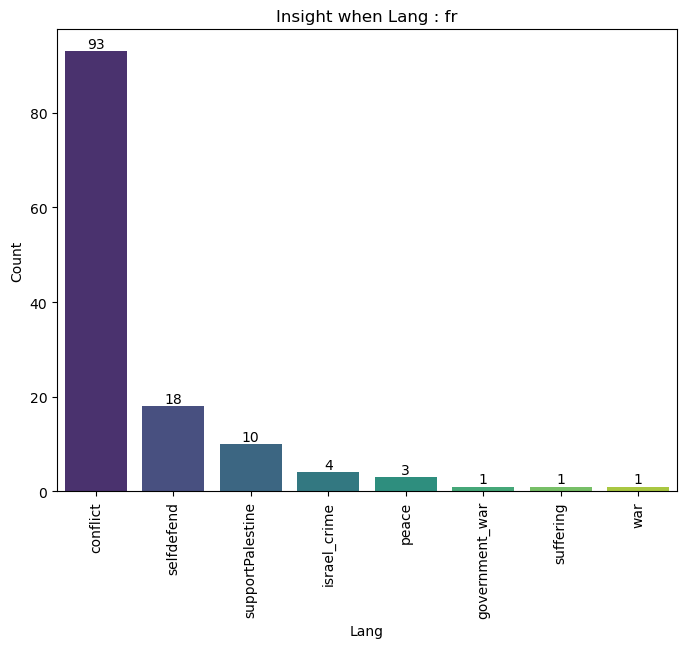

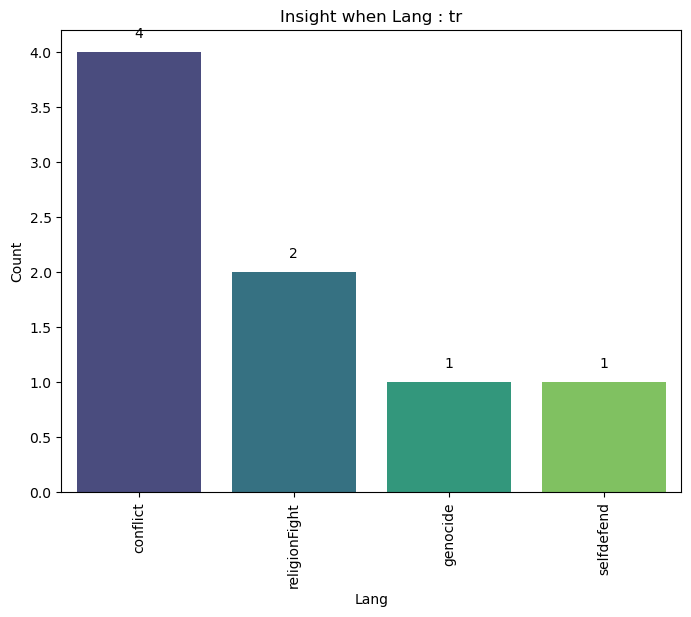

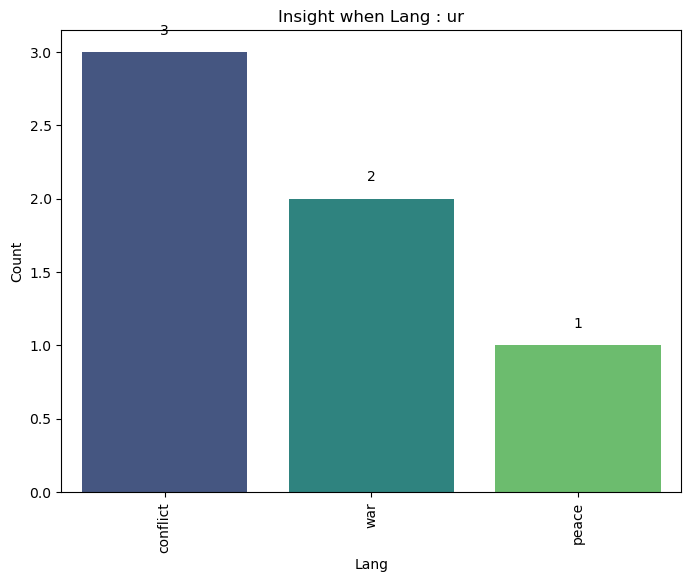

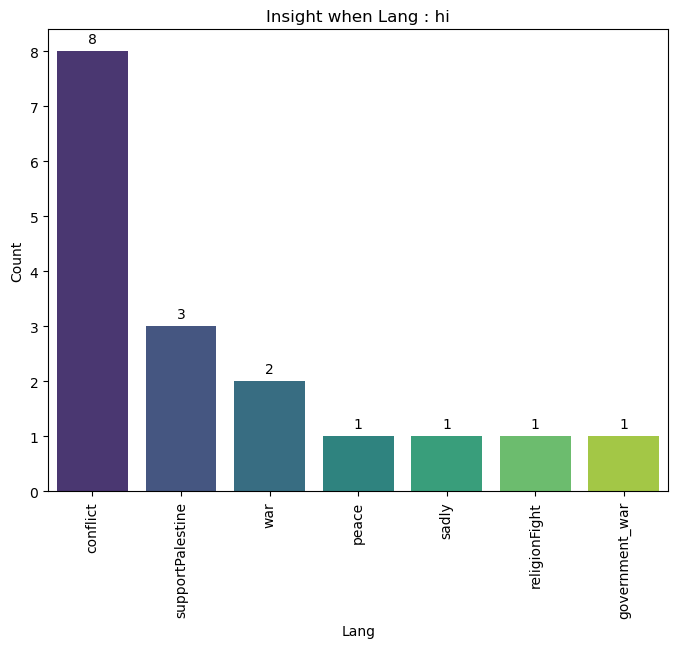

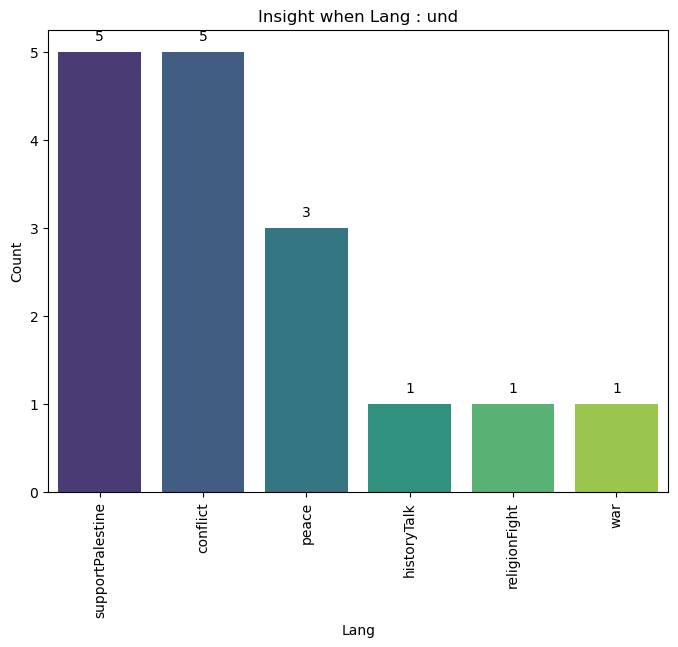

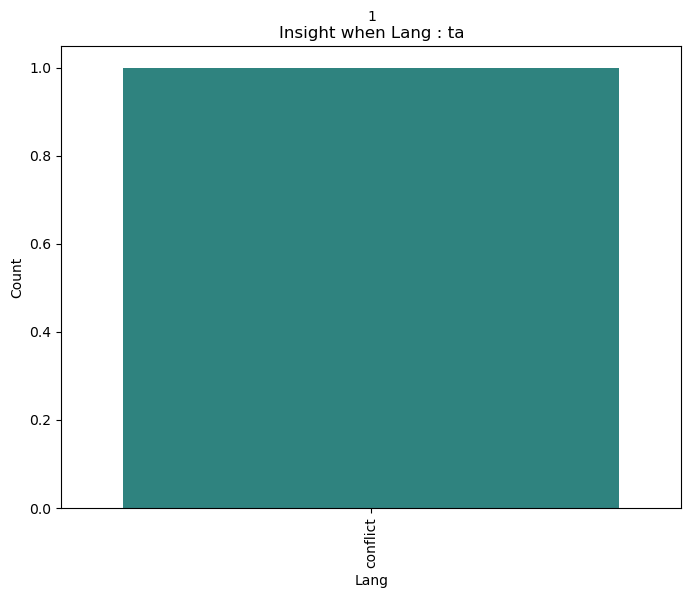

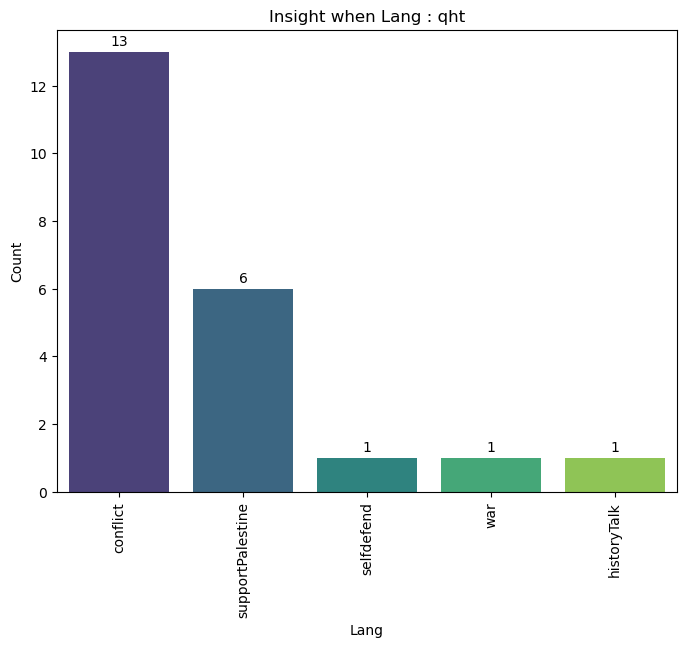

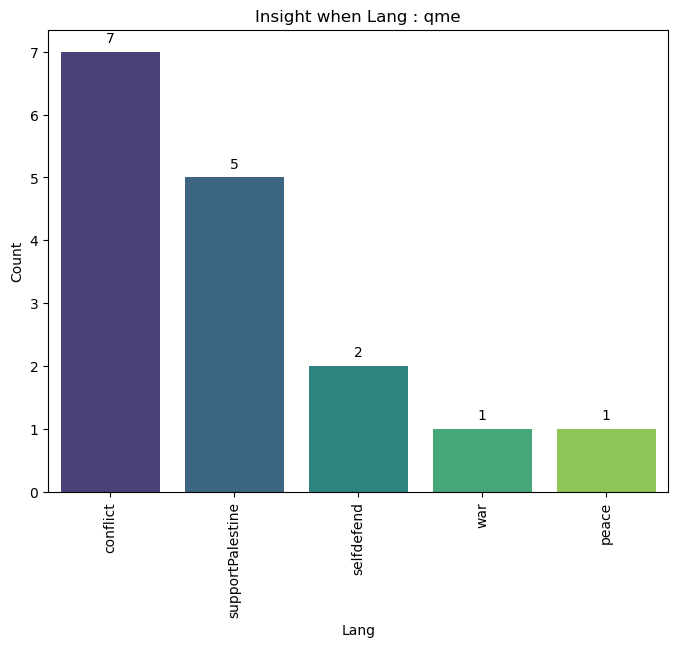

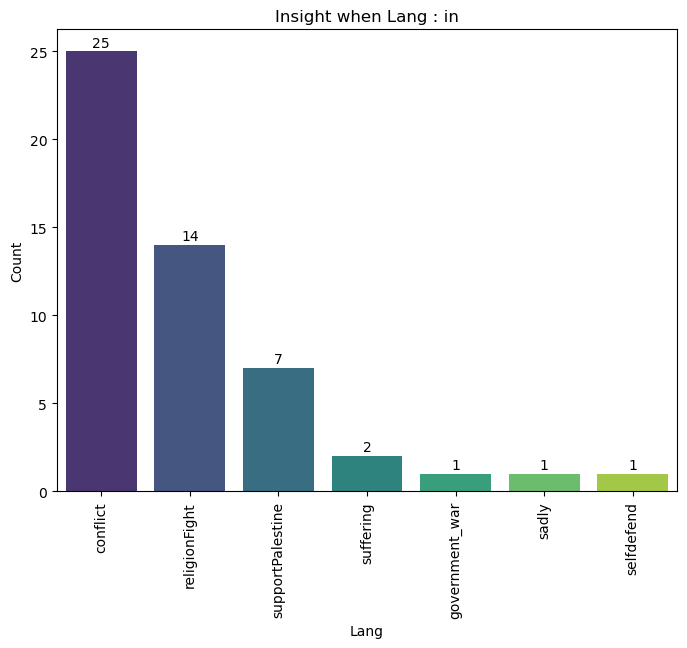

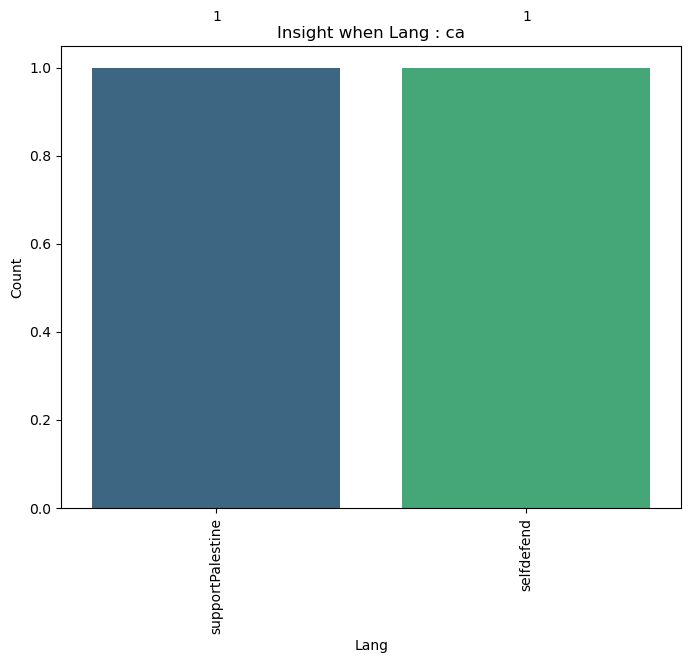

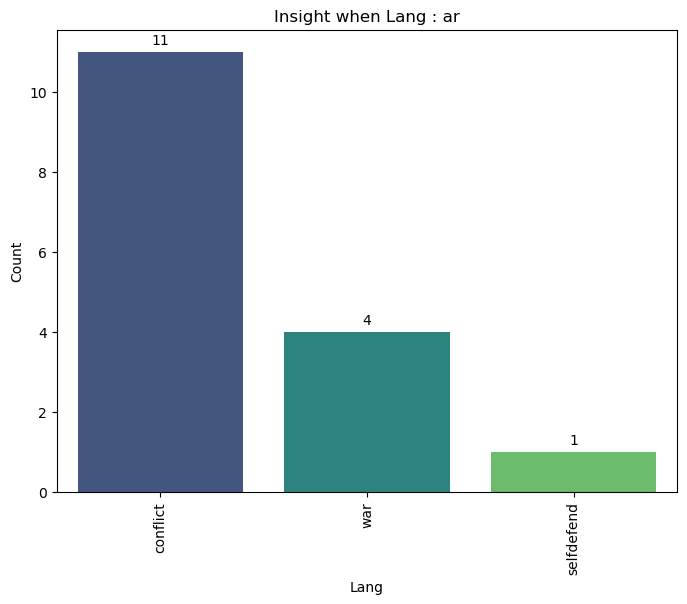

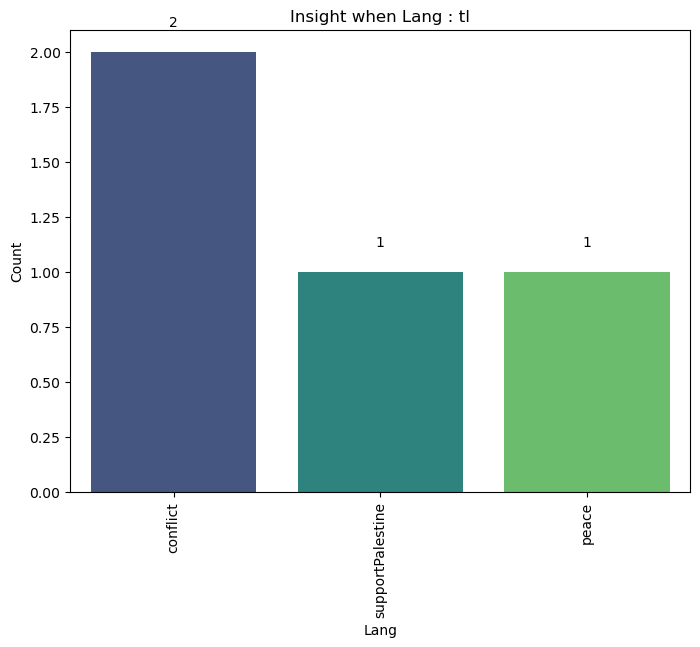

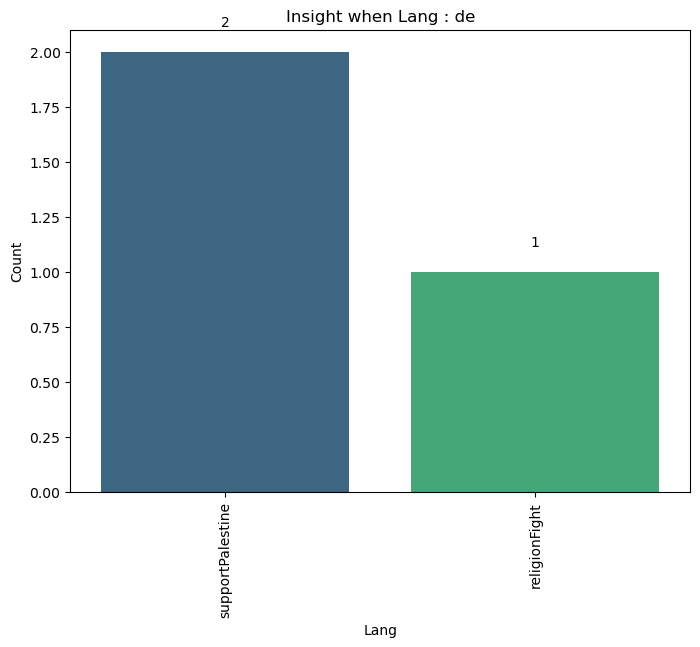

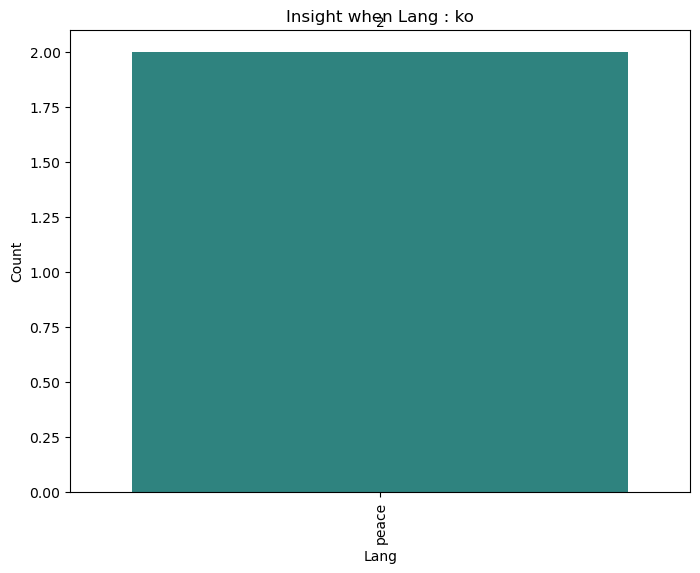

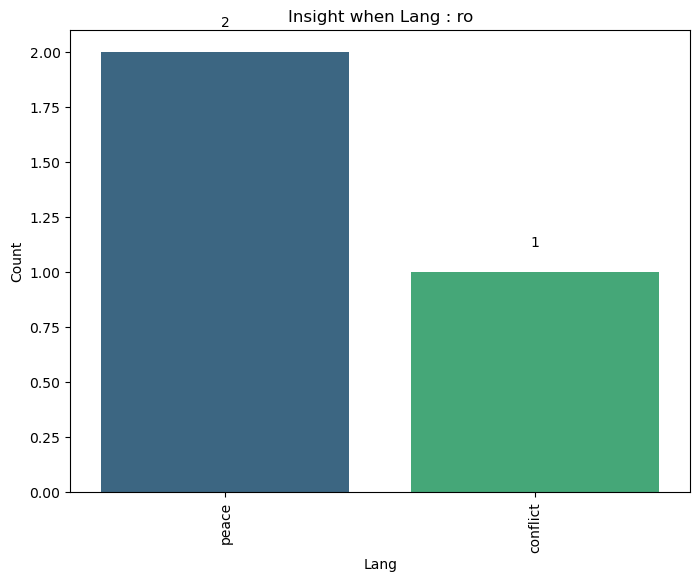

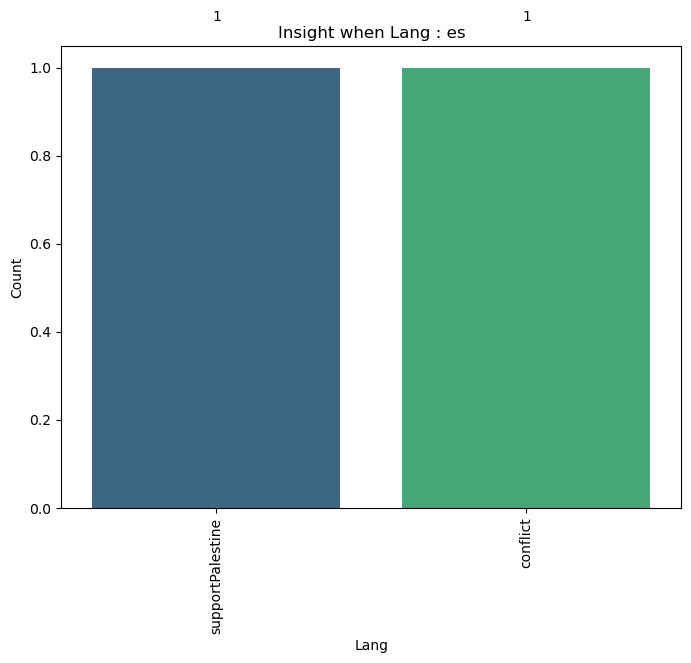

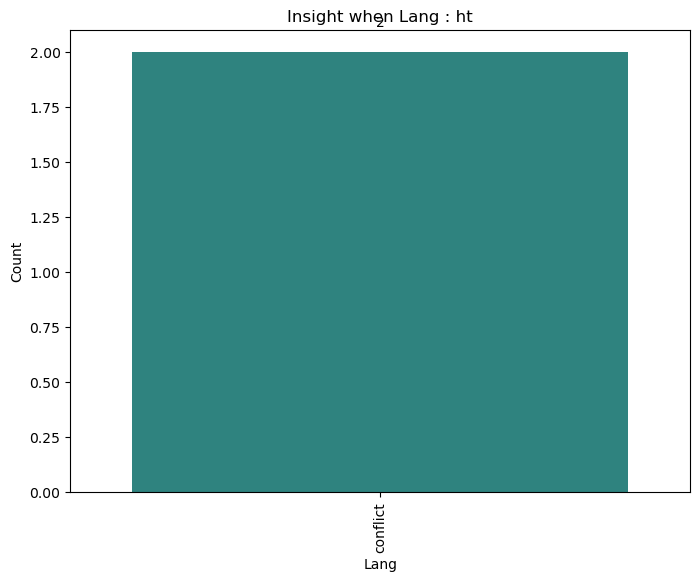

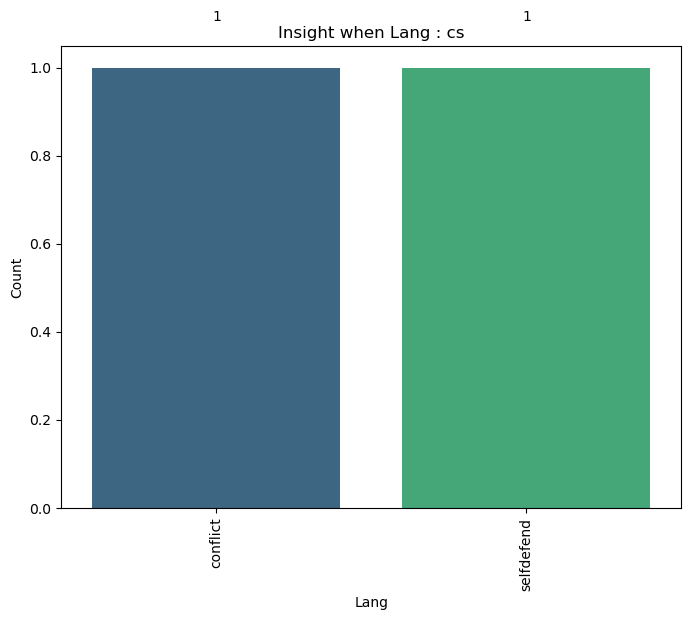

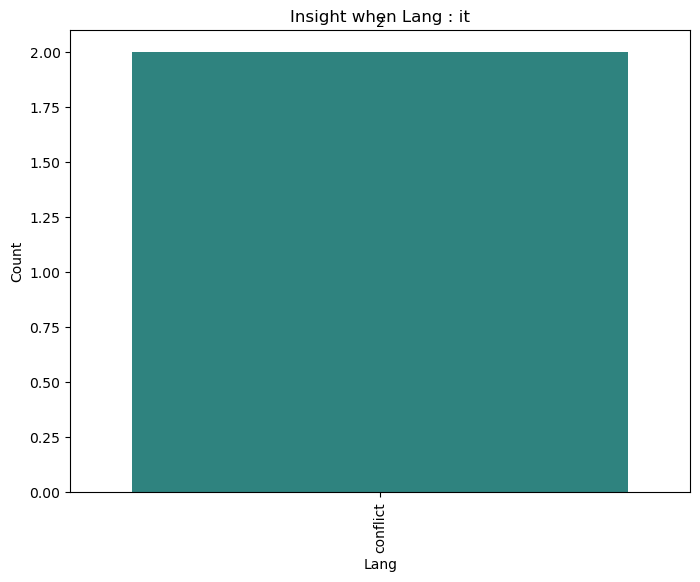

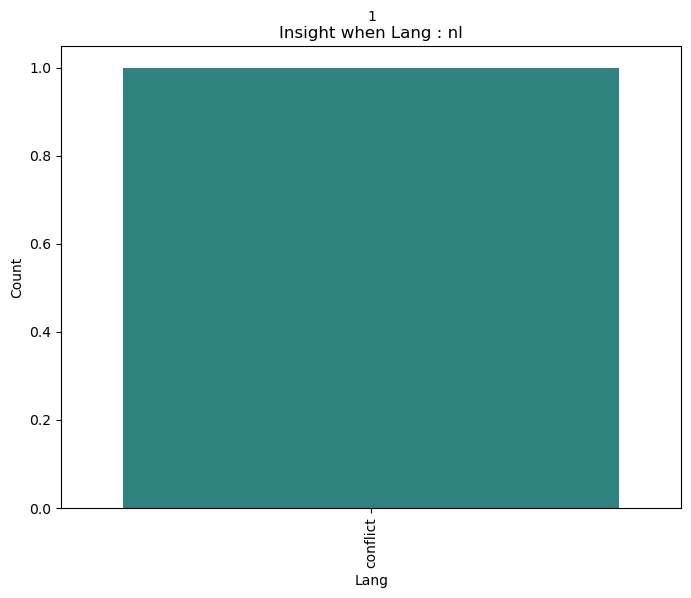

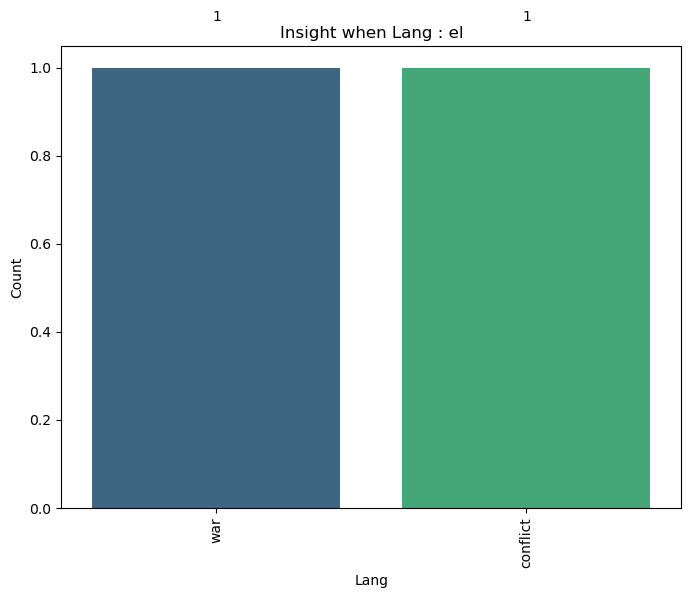

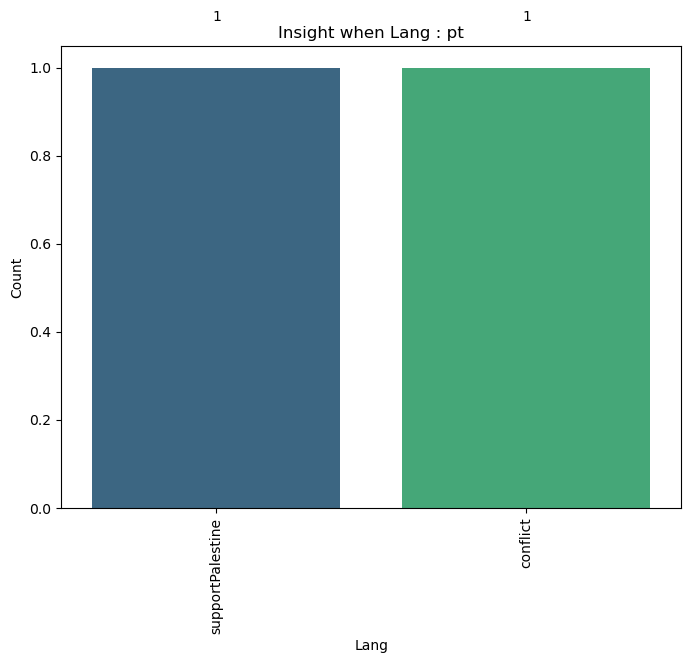

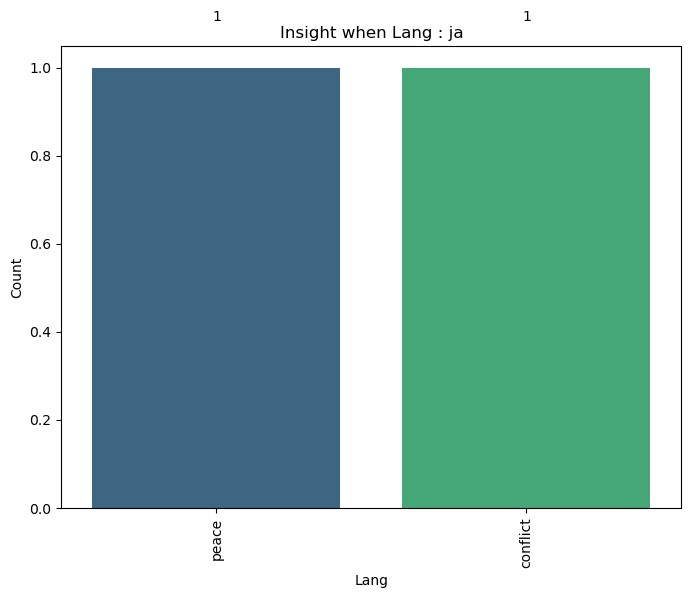

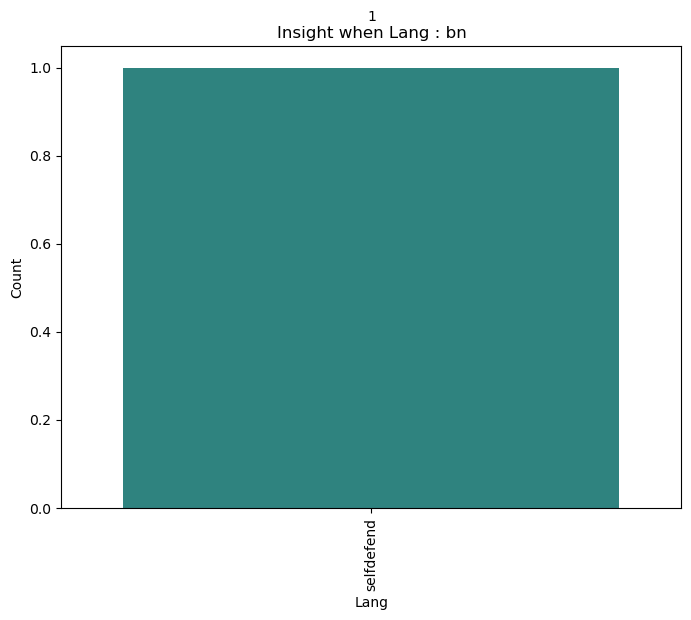

In [4]:
# Count occurrences of each sentiment
for kategori in kategori_count : 
    sentiment_counts = df1[df1['lang'] == kategori]['insight'].value_counts()

    # Create a bar chart using Matplotlib
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

    # Rotate x-axis labels vertically
    plt.xticks(rotation='vertical')

    # Display count values on top of each bar
    for i, count in enumerate(sentiment_counts.values):
        ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')


    plt.title('Insight when Lang : ' + kategori)
    plt.xlabel('Lang')
    plt.ylabel('Count')
    plt.show()

In [31]:
df1.to_csv('result.csv', index = False)